Pontificia Universidad Católica de Chile <br>
Departamento de Ciencia de la Computación <br>
IIC2433 - Minería de Datos
<br>

<center>
    <h2> Tarea 3 </h2>
    <h1> MLP, Regresión Logística y Redes Bayesianas</h1>
    <p>
        Profesor Marcelo Mendoza<br>
        Primer Semestre 2024<br>    
        Fecha de entrega: 17 de mayo
    </p>
    <br>
</center>

<br>

---

## Indicaciones

Deberás entregar **SOLO** el archivo .ipynb en el buzón respectivo en canvas.

**IMPORTANTE**:
- Se te dará puntaje tanto por código como por la manera en la que respondas las preguntas planteadas. Es decir, si tienes un código perfecto pero este no es explicado o no se responden preguntas asociadas a este, no se tendrá el puntaje completo.
- El notebook debe tener todas las celdas de código ejecutadas. Cualquier notebook que no las tenga no podrá ser corregido.
- El carácter de esta tarea es **INDIVIDUAL**. Cualquier instancia de copia resultará en un 1,1 como nota de curso.

---

## Librerías

A continuación se encuentran las librerías necesarias para elaborar la tarea. Recuerda ejecutar la celda antes de comenzar.

In [1]:
import pandas as pd
from keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from typing import List
import seaborn as sns
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import BayesianEstimator, HillClimbSearch, BicScore

## Parte 1: Carga y Preprocesamiento de Datos (10 Pts.)

Para esta tarea, deberás utilizar el dataset [Mushroom Dataset (Binary Classification)](https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset/data) que se puede encontrar en Kaggle.

### 1.1 Carga de Datos

Descarga el dataset y cárgalo a continuación en un dataframe de pandas.

In [3]:
df = pd.read_csv('mushroom.csv')
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


### 1.2 Descripción del dataset (2 Pts.)

A continuación, presenta una descripción detallada del dataset. Se espera que investigues los datos, y expliques en que consisten las columnas. Explica también cuál es la variable objetivo.

Por lo que logré investigar, cap, gill y stem son partes del hongo, por lo que se tienen distintos datos de cada parte del hongo, en donde cap es la parte superior del hongo, y ahi se tiene el diametro en una unidad de medida que probablemente sea mm y la forma que son ints porque hay formas "definidas". Para el caso de gill, es la parte inferior de la tapa del hongo y es lo que conecta esta con el tronco, el cual tiene la forma en la que se conecta y el color. El stem es el tronco, el tiene el ancho, la altura y el color. Por ultimo, se tiene la epoca de que supongo que se refiere a la de crecimiento y la clase, la cual considero que es la funcion objetivo para prediccion. Además considerando el origen de los datos la clase es si es comestible o no (venenosa).

### 1.3 Limpieza del dataset y Normalización (3 Pts.)

Como podrás notar, el dataset entregado se encuentra limpio de antemano. En particular, se usaron las siguientes técnicas de limpieza:
- Modal imputation
- one-hot encoding
- z-score normalization
- feature selection

Para este item debes:
1. Explicar cada una de las técnicas de limpieza que se utilizaron (con palabras).
2. Revisar en código si existen valores nulos, si hay columnas poco relevantes y si existe desbalance de clases.

MODAL IMPUTATION: Es una tecnica de imputacion de valores faltantes, la imputacion significa reemplazar los valores faltantes por un valor que se considera representativo. Es decir todos los valores que eran nulos no se eliminaron, sino que se reemplazaron por el valor mas comun de esa columna.
https://es.wikipedia.org/wiki/Imputaci%C3%B3n_(estad%C3%ADstica)#:~:text=En%20estad%C3%ADstica%2C%20la%20imputaci%C3%B3n%20es,determinadas%20t%C3%A9cnicas%20estad%C3%ADsticas%20de%20an%C3%A1lisis.

ONE-HOT ENCODING: Es una tecnica de codificacion para variables categoricas, en donde a cada columna categorica se le aplica el one hot encondig y por cada dato se le asigna un numero segun los datos de esa columna, por ejemplo en el caso de la clase, se tenia e y v, y estas se transformaron a 0 y 1 respectivamente. Lo mismo para el color y la forma.

Z-SCORE NORMALIZATION: Esta tecnica de normalización se basa en la media y la desviacion estandar de los datos, tomando en consideracionla distribucion normal de los datos.
https://www.turing.com/kb/data-normalization-with-python-scikit-learn-tips-tricks-for-data-science

FEATURE SELECTION: Esta tencnia se basa en seleccionar las caracteristicas mas relevantes y menos redundantes de los datos, para poder mejorar el rendimiento del modelo y reducir el tiempo de entrenamiento.
https://www.heavy.ai/technical-glossary/feature-selection#:~:text=Feature%20selection%20is%20the%20process,of%20datasets%20continue%20to%20grow.

In [4]:
df.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


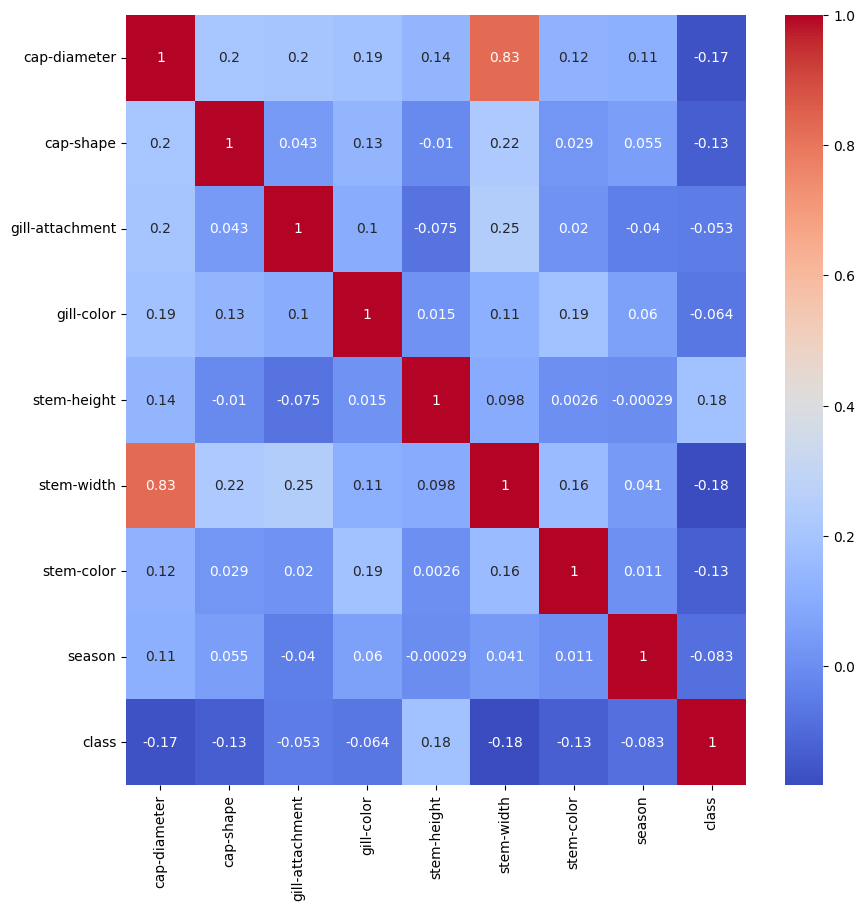

In [11]:
correlation = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [6]:
df.isnull().sum()

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

In [7]:
df['class'].value_counts()

class
1    29675
0    24360
Name: count, dtype: int64

In [8]:
class_counts = df['class'].value_counts()
percentage_0 = (class_counts[0] / len(df)) * 100
percentage_1 = (class_counts[1] / len(df)) * 100

print(f"Porcentaje de 0 en 'class': {percentage_0:.2f}%")
print(f"Porcentaje de 1 en 'class': {percentage_1:.2f}%")

Porcentaje de 0 en 'class': 45.08%
Porcentaje de 1 en 'class': 54.92%


Por el analisis anterior considero que la mayoría de las columnas son igual de relevantes, ya que se ven correlaciones similares entre todas las columnas, por lo que no eliminaria ninguna columna. Lo unico que quizas se podria eliminar es alguna de las columnas de dimensiones, ya que estas estan más correlacionadas entre si, por lo que podria ser "redundante" tenerlas o quizas entregan informacion similar. Pero no las eliminaria. No hay valores nulos, como se menciona antes, estas se "eliminaron" con la imputacion modal. Por ultimo, no hay un desbalance significativo entre las clases, ya que hay un 55% de venenosos y un 45% de comestibles.

### 1.4 Partición en conjuntos de entrenamiento y prueba (0 Pts.)

Parte los datos en conjuntos de entrenamiento y prueba. Utiliza un 80% de los datos para entrenamiento y un 20% para prueba. Utiliza random_state=42.

In [14]:
X = df.drop('class', axis=1)
y = df['class']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Parte 2: Redes Bayesianas (15 Pts)

A continuación debes realizar un análisis de redes bayesianas sobre el dataset, con la finalidad de poder inferir la probabilidad de que un hongo sea venenoso o no, dadas las características que se presentan en el dataset.

### 2.1 Redes Bayesianas: Explicación Teórica (5 Pts.)

Investiga sobre `Redes Bayesianas` y entrega una explicación de cómo funciona. `No es necesaria una explicación matemática`, el objetivo es que puedas tomar lo que aprendiste en clases o buscando en internet, y logres exponerlo de manera sintetizada para demostrar tu aprendizaje. Se espera que tu explicación contenga la respuesta a las siguientes preguntas: 
1. ¿Qué es? 
2. ¿Para qué sirve?
3. ¿Cómo se construye?
4. ¿Qué es un nodo y una arista en una red bayesiana?
5. ¿Qué es un CPD?

**:exclamation:IMPORTANTE:exclamation:** No utilices ChatGPT u otro modelo de lenguaje para responder esta pregunta. Será evaluado que cites al menos 1 recurso bibliográfico que hayas utilizado. Cualquier información que no tenga una referencia clara no se le dará puntaje.

Por lo que logre obtener de la clase, son redes entre variables segun la probabilidad condicional de una variable dada otra, generando relaciones entre estas. Sirven para modelar las relaciones y poder hacer suposiciones de un dato respecto la relacion que tiene con otros. Se construye a partir de las dependencias entre los datos, que son calculables si es que no se tienen y se genera una especie de grafo. Un nodo es una variable y una arista es la relacion entre dos nodos, es decir la dependencia de uno segun el otro, en consideracion a las probabilidades condicionales. Un CPD es la probabilidad condicional de una variable segun otra, es decir el "grado de dependencia" entre estos datos.

Busqueda para informacion más precisa: 

### 2.2 Aprender la estructura de la red bayesiana (3 Pts.)

Utiliza la librería pgmpy en Python para aplicar el algoritmo Hill Climb Search con el criterio de puntuación BIC y encontrar la estructura óptima de una red bayesiana. Puedes guiarte de las actividades vistas en clases.

In [18]:
hc = HillClimbSearch(X_train)
best_model = hc.estimate(scoring_method=BicScore(X_train))
print(best_model.edges())

# Utilizar con y?

  0%|          | 0/1000000 [00:00<?, ?it/s]

[('gill-attachment', 'cap-shape'), ('gill-attachment', 'season'), ('gill-color', 'gill-attachment'), ('gill-color', 'stem-color'), ('stem-color', 'cap-shape'), ('stem-color', 'gill-attachment'), ('stem-color', 'season')]


### 2.3 Encontrar la estructura óptima (2 Pts.)

En esta sección, debes entrenar la red bayesiana con los datos de entrenamiento usando la estructura óptima encontrada en la sección anterior. Luego, debes imprimir las probabilidades condicionales de la red bayesiana.

### 2.4 Inferencia sobre los datos (5 pts)

Finalmente, debes realizar inferencia sobre la red bayesiana. Para esto, se te pide que calcules la probabilidad de que los siguientes hongos sean venenosos o no, dadas sus características:

- Hongo 1: 'gill-color': 7, 'stem-color': 3, 'cap-shape': 1
- Hongo 2: 'stem-color': 2, 'cap-shape': 3
- Hongo 3: 'gill-attachment': 2, 'gill-color': 3

## Parte 3: Perceptron y MLP (15 Pts.)

### 3.1 Perceptron: Explicación teórica (2.5 Pts)

Investiga sobre `Perceptron` y entrega una explicación de cómo funciona. `No es necesaria una explicación matemática`, el objetivo es que puedas tomar lo que aprendiste en clases o buscando en internet, y logres exponerlo de manera sintetizada para demostrar tu aprendizaje. Se espera que tu explicación contenga la respuesta a las siguientes preguntas: 
1. ¿Qué es? 
2. ¿Para qué sirve? 
3. ¿Cómo funciona? 
4. ¿Cuáles son sus ventajas y desventajas? 
5. ¿En qué situaciones se puede utilizar? 
6. ¿Qué tipo de problemas puede resolver? 
7. ¿Qué son los pesos y función de activación? 
8. ¿Cuáles son las limitaciones del modelo?

**:exclamation:IMPORTANTE:exclamation:** No utilices ChatGPT u otro modelo de lenguaje para responder esta pregunta. Será evaluado que cites al menos 1 recurso bibliográfico que hayas utilizado. Cualquier información que no tenga una referencia clara no se le dará puntaje.

### 3.2 Multi-Layer Perceptron: Explicación teórica (2.5 Pts)

De forma similar a 2.1, investiga sobre `Multi-Layer Perceptron` y entrega una explicación de cómo funciona. `No es necesaria una explicación matemática`, el objetivo es que puedas tomar lo que aprendiste en clases o buscando en internet, y logres exponerlo de manera sintetizada para demostrar tu aprendizaje. Se espera que tu explicación contenga la respuesta a las siguientes preguntas:
1. ¿Qué es?
2. ¿Para qué sirve?
3. ¿Cómo funciona?
4. ¿Cuáles son las diferencias con el Perceptron?
5. ¿Cuándo es mejor utilizar un MLP en vez de un Perceptron?

**:exclamation:IMPORTANTE:exclamation:** No utilices ChatGPT u otro modelo de lenguaje para responder esta pregunta. Será evaluado que cites al menos 1 recurso bibliográfico que hayas utilizado. Cualquier información que no tenga una referencia clara no se le dará puntaje.

### 3.3 Crear y Entrenar MLP (4 Pts)

Entrene un clasificador de MLP con los datos de `entrenamiento`. Tienes libertad para modificar los hiperparámetros, cantidad de capas, neuronas, etc. Pero toda decisión debe ser `justificada`. Recuerda que el objetivo es obtener el mejor modelo posible. Para justificar tus decisiones puedes experimentar, buscar documentación o lo que estimes conveniente.

**Importante:** No se evalúa que el modelo sea el mejor, si no que se justifiquen las decisiones tomadas. Es decir, no sirve de nada tener un porcentaje de acierto alto si no se justifica por qué se llegó a ese resultado. En esta parte, el código tiene menor relevancia. Lo importante es la justificación.

### 3.4 Evaluar MLP (3 Pts)

Evalúe el modelo con los datos de `testing` y calcule `accuracy`, `precision`, `recall` y `f1-score`. Puedes apoyarte de un reporte de clasificación. Comenta todos los resultados y explica qué significa cada métrica.

### 3.5 Matriz de Confusión (3 Pts)

Genere una `matriz de confusión` normalizada del modelo y responda las preguntas:
1. ¿Qué significa cada fila de la matriz?
2. ¿Qué significa cada columna de la matriz?
3. Explique error `tipo I` y error `tipo II` en base a la matriz de confusión.
4. ¿Cuál es el error más grave en este caso?

## Parte 4: Regresión Logística (15 Pts.)

### 4.1 Regresión Logística: Explicación teórica (4.5 pts)

Investiga sobre `Regresión Lógistica` y da una explicación con tus propias palabras de cómo funciona. Nuevamente no se espera una demostración matemática, el objetivo es que demuestres tu aprendizaje. Debes responder las siguientes preguntas:
1. ¿Qué es?
2. ¿Para qué sirve?
3. ¿Cómo funciona?
4. ¿Qué tipo de problemas resuelve?
5. ¿Cuáles son sus ventajas y desventajas?
6. ¿Qué es la función sigmoide?
7. ¿Qué son los pesos y el sesgo?
8. ¿Cuál es la diferencia entre la regresión logística y la regresión lineal?
9. ¿En qué situaciones es mejor utilizar regresión logística?

**:exclamation:IMPORTANTE:exclamation:** No utilices ChatGPT u otro modelo de lenguaje para responder esta pregunta. Será evaluado que cites al menos 1 recurso bibliográfico que hayas utilizado. Cualquier información que no tenga una referencia clara no se le dará puntaje.

### 4.2 Crear y Entrenar Regresión Logística (6 pts)

Crea y entrena un modelo de regresion logistica con los datos de entrenamiento, donde a traves del parametro `solver`, deberas elegir minimo 3 opciones diferentes de algoritmos de optimizacion, responder `cuales son sus principales diferencias` respecto a como actualizan los parametros del modelo y `dar una hipotesis` sobre cual crees que sera el algoritmo que funcione mejor para este dataset. Recuerda que la idea es que `justifiques tu respuesta`.

### 4.3 Evaluar Regresión Logística (2.5 pts)

Para cada uno de tus modelos anteriores (del punto 4.2), evalua el modelo con los datos de testing y calcula `accuracy`, `precision`, `recall` y `f1-score`. Puedes apoyarte de un reporte de clasificación. Comenta todos los resultados y explica qué significan.

### 4.4 Matriz de Confusión (2 pts)

De los modelos elegidos previamente, escoja el que mejor funcione y genere una `matriz de confusión` del modelo y responda la siguiente pregunta:

1. De los errores que puede cometer el modelo, ¿cuál es el más grave en este caso?

## Parte 5: Comparación de Modelos (10 Pts.)

1. ¿Cuáles son las ventajas y desventajas de utilizar redes bayesianas en comparación con modelos de regresión logística en el contexto del conjunto de datos Mushroom Dataset? Considera la capacidad de capturar relaciones probabilísticas complejas y la interpretabilidad de los resultados.

2. En base a los resultados, ¿qué modelo elegirías para clasificar los hongos entre la R? Justifica tu elección teniendo en cuenta las métricas de evaluación y la gravedad de los errores tipo I y tipo II.